# Centroid Tracking Algorithm

### Step 1: Accept bounding box coordinates and compute centroids

#### 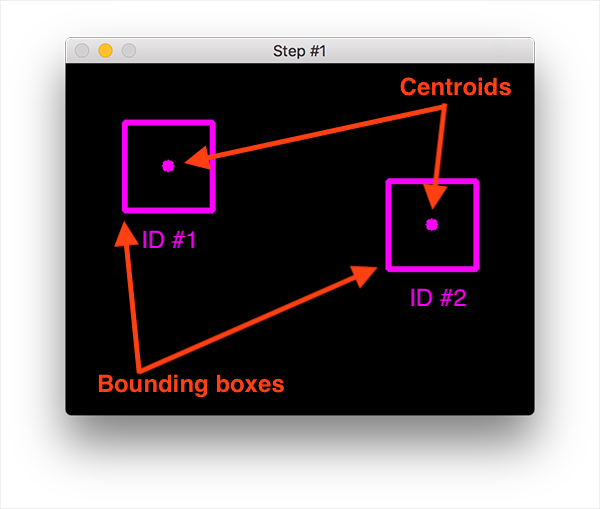
###### Figure 1: To build a simple object tracking algorithm using centroid tracking, the first step is to accept bounding box coordinates from an object detector and use them to compute centroids.

#### The centroid tracking algorithm assumes that we are passing in a set of bounding box (x, y)-coordinates for each detected object in every single frame.

#### These bounding boxes can be produced by any type of object detector you would like (color thresholding + contour extraction, Haar cascades, HOG + Linear SVM, SSDs, Faster R-CNNs, etc.), provided that they are computed for every frame in the video.

#### Once we have the bounding box coordinates we must compute the “centroid”, or more simply, the center (x, y)-coordinates of the bounding box. Figure 1 above demonstrates accepting a set of bounding box coordinates and computing the centroid.

#### Since these are the first initial set of bounding boxes presented to our algorithm we will assign them unique IDs.

### Step 2: Compute Euclidean distance between new bounding boxes and existing objects

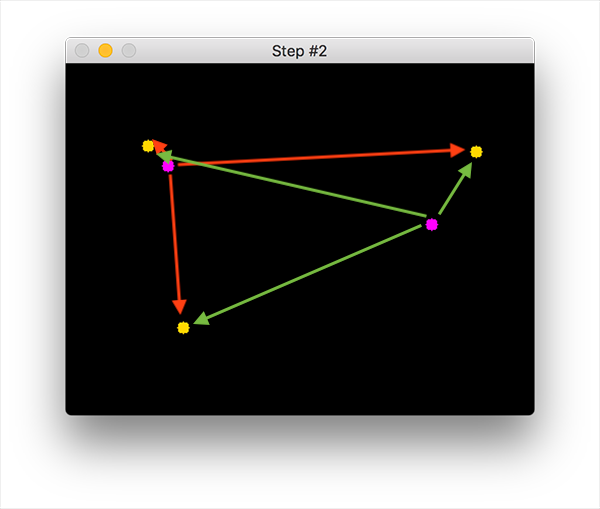
##### Figure 2: Three objects are present in this image for simple object tracking with Python and OpenCV. We need to compute the Euclidean distances between each pair of original centroids (red) and new centroids (green).

#### For every subsequent frame in our video stream we apply Step #1 of computing object centroids; however, instead of assigning a new unique ID to each detected object (which would defeat the purpose of object tracking), we first need to determine if we can associate the new object centroids (yellow) with the old object centroids (purple). To accomplish this process, we compute the Euclidean distance (highlighted with green arrows) between each pair of existing object centroids and input object centroids.

#### From Figure 2 you can see that we have this time detected three objects in our image. The two pairs that are close together are two existing objects
#### We then compute the Euclidean distances between each pair of original centroids (yellow) and new centroids (purple). But how do we use the Euclidean distances between these points to actually match them and associate them?

### Step 3: Update (x, y)-coordinates of existing objects
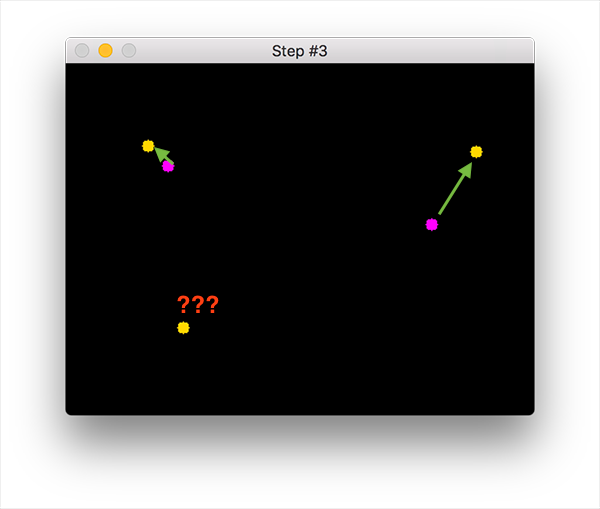
##### Figure 3: Our simple centroid object tracking method has associated objects with minimized object distances. What do we do about the object in the bottom left though?

#### The primary assumption of the centroid tracking algorithm is that a given object will potentially move in between subsequent frames, but the distance between the centroids for frames F_t and F_{t + 1} will be smaller than all other distances between objects.

#### Therefore, if we choose to associate centroids with minimum distances between subsequent frames we can build our object tracker.

#### In above Figure you can see how our centroid tracker algorithm chooses to associate centroids that minimize their respective Euclidean distances.

#### But what about the lonely point in the bottom-left?

#### It didn’t get associated with anything — what do we do with it?

### Step 4: Register new objects

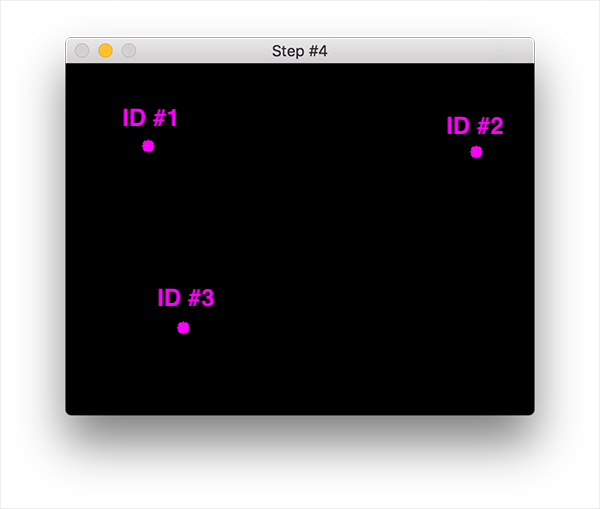

##### Figure 4: In our object tracking with Python and OpenCV example, we have a new object that wasn’t matched with an existing object, so it is registered as object ID #3.

#### In the event that there are more input detections than existing objects being tracked, we need to register the new object. “Registering” simply means that we are adding the new object to our list of tracked objects by:

#### 1- Assigning it a new object ID
#### 2- Storing the centroid of the bounding box coordinates for that object


#### We can then go back to Step #2 and repeat the pipeline of steps for every frame in our video stream.

#### Figure 4 demonstrates the process of using the minimum Euclidean distances to associate existing object IDs and then registering a new object.

### Step 5: Deregister old objects

#### Any reasonable object tracking algorithm needs to be able to handle when an object has been lost, disappeared, or left the field of view.

#### Exactly how you handle these situations is really dependent on where your object tracker is meant to be deployed, but for this implementation, we will deregister old objects when they cannot be matched to any existing objects for a total of N subsequent frames.